In [4]:
import os
import cv2
import numpy as np
import albumentations as A
import matplotlib.pyplot as plt
from config import IMAGE_PATH, ANNOTATION_PATH, KEY_POINT_LABELS, IMAGE_SIZE
from utils import format_image_id, parse_annotations

In [17]:
image_id = 1
imagepth = os.path.join(IMAGE_PATH, format_image_id(image_id)+'.jpg')
image = cv2.imread(imagepth)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

keypoints = parse_annotations(os.path.join(ANNOTATION_PATH, format_image_id(image_id)+'.txt'), all_points=False)
keypoints = keypoints

In [5]:
transform = A.Compose([
    A.RandomCrop(width=800, height=800),
    A.RandomBrightnessContrast(p=0.2),
], keypoint_params=A.KeypointParams(format='xy', 
                                    label_fields=['point_labels'], 
                                    remove_invisible=True))

In [6]:
transformed = transform(image=image, keypoints=keypoints, 
                        point_labels=KEY_POINT_LABELS)
transformed_image = transformed['image']
transformed_keypoints = transformed['keypoints']

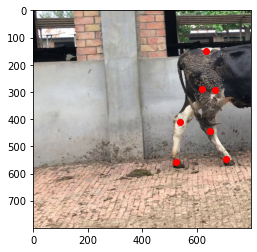

In [8]:
for annot in transformed_keypoints:
    plt.plot(annot[0], annot[1], color='red', marker='o')

plt.imshow(transformed_image)

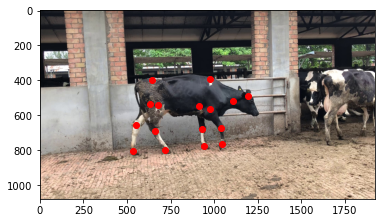

In [18]:
for annot in keypoints:
    plt.plot(annot[0], annot[1], color='red', marker='o')

plt.imshow(image)

In [19]:
resized_image = cv2.resize(image, (256, 256), interpolation=cv2.INTER_AREA)

In [22]:
h_scale = 256/IMAGE_SIZE[0]
w_scale = 256/IMAGE_SIZE[1]

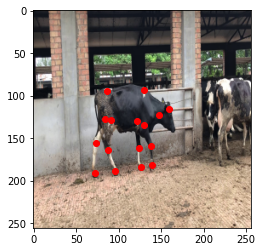

In [24]:
for annot in keypoints:
    plt.plot(annot[0]*w_scale, annot[1]*h_scale, color='red', marker='o')

plt.imshow(resized_image)

In [25]:
A = np.array([1,1,1,1], dtype=np.uint8)

In [26]:
A/2

array([0.5, 0.5, 0.5, 0.5])

# Loading Data

In [27]:
import os
os.listdir('data')

['boxes.npy', 'images.npy', 'labels.npy']

In [30]:
image_f = open(os.path.join('data', 'images.npy'), 'rb')
annot_f = open(os.path.join('data', 'labels.npy'), 'rb')
boxes_f = open(os.path.join('data', 'boxes.npy'), 'rb')
resized_images = np.load(image_f)
resized_labels = np.load(annot_f)
resized_boxes = np.load(boxes_f)


In [31]:
resized_images.shape

(2134, 3, 216, 384)

In [32]:
id_ = 0

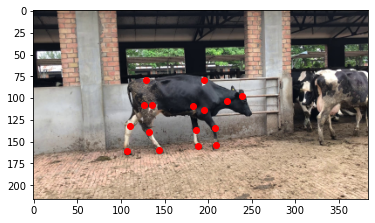

In [33]:
for annot in resized_labels[id_][0]:
    plt.plot(annot[0], annot[1], color='red', marker='o')

plt.imshow(np.moveaxis(resized_images[id_], 0, -1))

In [33]:
resized_images[id_].shape

(3, 256, 256)

In [36]:
annot[0]

14

In [46]:
resized_labels[id_][0]

array([[22, 55,  1],
       [11,  1,  1],
       [27, 32,  1],
       [27, 13,  1],
       [ 1, 38,  1],
       [ 2, 60,  1],
       [19,  8,  0],
       [22, 40,  1],
       [23,  1,  1],
       [17, 33,  1],
       [22,  6,  1],
       [19, 42,  1],
       [27,  7,  1],
       [15,  6,  0],
       [ 5, 34,  1],
       [ 3,  9,  1]], dtype=uint8)